In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import edward as ed
import numpy as np
import tensorflow as tf

In [185]:
n_cust = 10
n_order = 5000

df = pd.DataFrame(index=np.arange(0, n_order))
df['customer'] = np.random.choice(a=n_cust, size=n_order)
df['price'] = np.random.gamma(scale=20, shape=3, size=n_order)
dfc = pd.DataFrame(index=np.arange(0, n_cust))
dfc['customer_factor'] = np.random.normal(loc=1, scale=0.3, size=n_cust)
df = df.merge(dfc, left_on='customer', right_index=True)
# df['above'] = (df['customer_up'] <= df['price']).astype(int)
# df['below'] = (df['customer_up'] > df['price']).astype(int)

df['customer_price'] = df['customer_factor'] * df['price'] + np.random.normal(loc=1, scale=100, size=n_order)
    

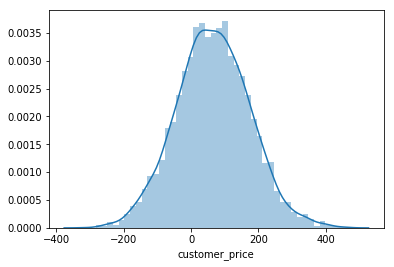

In [186]:
sns.distplot(df['customer_price'])

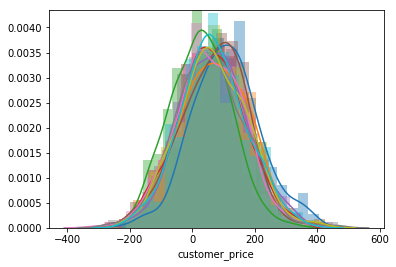

In [187]:
for name, gr_df in df.groupby('customer'):
    sns.distplot(gr_df['customer_price'])

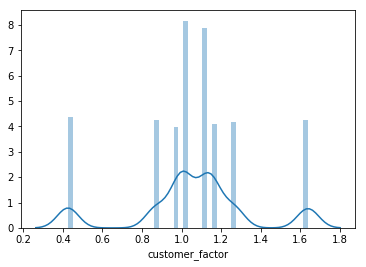

In [188]:
sns.distplot(df['customer_factor'])

We build a toy datasets where the target depends linear on the features.

In [189]:
C = tf.placeholder(tf.int64, [n_order])
P = tf.placeholder(tf.float32, [n_order])

Cf = ed.models.Normal(loc=tf.ones(n_cust), scale=tf.ones(n_cust)*10)

Cf_l = tf.nn.embedding_lookup(Cf, C)

PC = ed.models.Normal(loc=Cf_l * P, scale=tf.ones(n_order))



In [190]:
Cfw = ed.models.Normal(loc=tf.Variable(tf.random_normal([n_cust])), 
                       scale=tf.nn.softplus(tf.Variable(tf.random_normal([n_cust]))))

In [191]:
inference = ed.KLqp(
    {Cf: Cfw}, data={PC: df['customer_price'].values, P: df['price'].values, C: df['customer'].values})
inference.run(n_samples=5, n_iter=1000)

1000/1000 [100%] ██████████████████████████████ Elapsed: 5s | Loss: 24956746.000


In [192]:
P_post = ed.copy(P, {Cf: Cfw})
# This is equivalent to
# y_post = Normal(loc=ed.dot(X, qw) + qb, scale=tf.ones(N))

In [193]:
cc = Cfw.value()

In [194]:
Cfw.eval()

array([ 1.72299457,  1.14448428,  0.4086723 ,  0.98065221,  1.20557547,
        1.19143581,  0.92547965,  1.04978395,  1.12009716,  1.12829471], dtype=float32)

In [195]:
Cfw.scale

<tf.Tensor 'Normal_32/scale:0' shape=(10,) dtype=float32>

In [196]:
Cfw.parameters['loc'].eval()

array([ 1.72790372,  1.15037274,  0.39646655,  0.98604649,  1.21997011,
        1.17781901,  0.94340891,  1.03157377,  1.1181035 ,  1.15185452], dtype=float32)

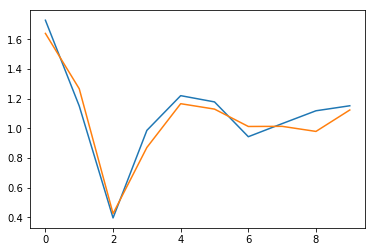

In [197]:
plt.plot(Cfw.parameters['loc'].eval())
#plt.plot(Cfw.eval())
plt.plot(dfc['customer_factor'] )
#plt.plot(Cfw.sample(10000).eval().mean(0))

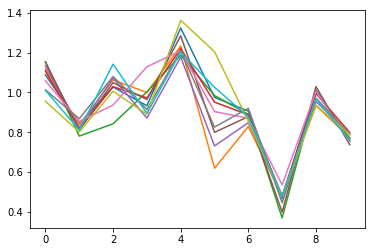

In [117]:
for i in range(10):
    plt.plot(Cfw.eval())

In [97]:
Cfw.sample(1000).eval().mean(0)

array([ 1.09527302,  0.83410221,  1.02604222,  0.91952825,  1.17235196,
        0.92556852,  0.8816818 ,  0.46498147,  0.9848336 ,  0.78545642], dtype=float32)

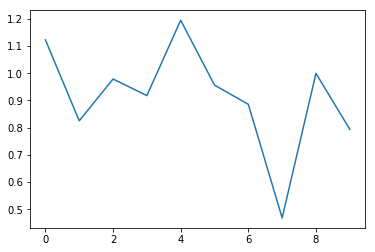

In [90]:
plt.plot(dfc['customer_factor'] )

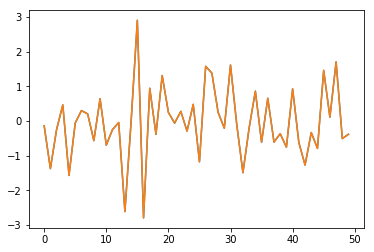

In [14]:
b_est = sample.mean(axis=0)
plt.plot(w_est)
plt.plot(w_true)

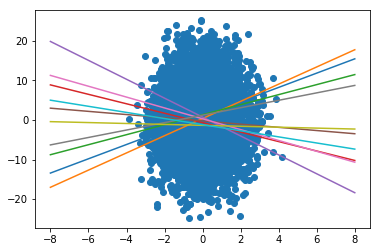

In [15]:
# Visualize samples from the prior.
visualise(X_train, y_train, w, b)

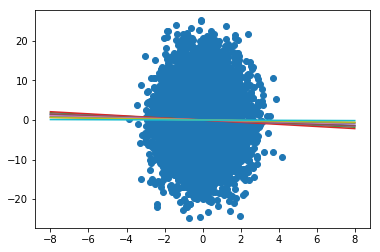

In [16]:
# Visualize samples from the posterior.
visualise(X_train, y_train, qw, qb)